## 01) 주가지수

In [3]:
import pandas as pd

df_13 = pd.read_excel('data/data_20210913.xlsx', index_col=0)
df_14 = pd.read_excel('data/data_20210914.xlsx', index_col=0)
print(len(df_13))
print(len(df_14))

936
937


In [16]:
# 9월 13일에는 936개 종목, 9월 14일에는 937개 종목이 상장돼 있음을 알 수 있습니다. 
# 종목의 변화가 생겼기 때문에 기준시가총액을 수정해서 사용해야 합니다.

# 출력된 결과를 참고하면 2021-09-14에는 395400의 SK리츠가 추가 상장된 것을 알 수 있습니다. 
# 행과 열의 정보를 한 번에 선택하는 인덱싱을 사용했습니다.
idx = df_14.index.difference(df_13.index)
print(idx)
print(df_14.loc[idx[0], '종목명'])

Index(['395400'], dtype='object', name='종목코드')
SK리츠


In [19]:
# 다음 코드는 시가총액의 증감률을 구해서 수정된 기준시가총액을 유도하고 최종적으로 지수의 증감률을 출력합니다.

전일비교시가총액 = df_13['시가총액'].sum()
전일기준시가총액 = df_13['시가총액'].sum()
증감률 = (전일비교시가총액 + df_14.loc[idx[0], '시가총액']) / 전일비교시가총액
당일기준시가총액 = 증감률 * 전일기준시가총액
당일비교시가총액 = df_14['시가총액'].sum()
print(당일비교시가총액 / 당일기준시가총액)

1.006711949331194


In [20]:
# 출력되는 결과를 참고하면 2021-09-14의 지수는 반올림해서 약 0.67% 상승했음을 알 수 있습니다. 
# 그림 8.1.1의 등락률 컬럼의 값과 비슷하죠? 아직 고려해야 할 내용이 남아 있어서 완전히 같지 않습니다.
# 종목의 상장뿐만 아니라 전환 사채 등의 이슈로 주식 수가 변경되는 것도 반영해야 합니다. 
# 주식 수가 변경된 종목이 있는지 확인해 봅시다.

idx = df_14.index.intersection(df_13.index)
t_13 = df_13.loc[idx]
t_14 = df_14.loc[idx]
cond = t_13['상장주식수'] != t_14['상장주식수']
print(cond.all()) # 시리즈의 all 메서드는 시리즈의 모든 값이 True 라면 True를, 그렇지 않다면 False를 반환합니다. 

False


In [30]:
cond[cond == True]

종목코드
001570    True
011930    True
Name: 상장주식수, dtype: bool

In [25]:
# 조건 슬라이싱과 시리즈 연산으로 변경사항이 있는 종목들의 추가된 상장주식 수를 출력합니다.

t_14.loc[cond, '상장주식수'] - t_13.loc[cond, '상장주식수'] 


종목코드
001570    499996
011930      5661
Name: 상장주식수, dtype: int64

In [32]:
# 주식 수의 증가에 따른 시가총액을 수정된 비교시가총액에 반영해 봅시다. 
# 2021-09-13의 종가와 추가된 주식 수를 곱해서 증가액을 계산하고 증감률에 반영합니다. 
# 라인 1과 라인 4의 변경된 코드를 눈여겨보세요.

주식수증가액 = (t_14.loc[cond, '상장주식수'] - t_13.loc[cond, '상장주식수']) * t_13.loc[cond, '종가']
전일비교시가총액 = df_13['시가총액'].sum()
전일기준시가총액 = df_13['시가총액'].sum()
증감률 = (전일비교시가총액 + df_14.loc[idx[0], '시가총액'] + 주식수증가액.sum()) / 전일비교시가총액
당일기준시가총액 = 증감률 * 전일기준시가총액
당일비교시가총액 = df_14['시가총액'].sum()
print(당일비교시가총액 / 당일기준시가총액)

1.0069842957814492


## 02) 코스피와 삼성전자

In [34]:
# 2021-09-14을 기준으로 코스피 시장에 상장된 종목들의 현황을 확인해 보겠습니다. 
# 엑셀 파일의 전 종목 데이터를 읽어와서 종목명, 종가, 시가총액 컬럼만을 선택합니다.

import pandas as pd
df = pd.read_excel('data/data_20210914.xlsx', index_col=0)
df = df[['종목명', '종가', '시가총액']]
df

,종목명,종가,시가총액
종목코드,,,
095570,AJ네트웍스,6000,280933770000
006840,AK홀딩스,27700,366957439700
027410,BGF,6260,599187111660
282330,BGF리테일,179000,3093819174000
138930,BNK금융지주,8070,2630297435220
...,...,...,...
069260,휴켐스,27050,1105765805400
000540,흥국화재,4045,259861499025
000547,흥국화재2우B,29500,4531200000


In [35]:
# usescols 파라미터를 사용하면 한 번에 필요한 컬럼을 선택할 수 있어서 매우 편리합니다. 
# 원본 엑셀 데이터에서 종목코드, 종목명, 종가, 시가총액의 네 개의 컬럼을 선택하고 나서, 
# index_col로 0번 컬럼을 인덱스로 지정합니다.

df = pd.read_excel('data/data_20210914.xlsx', index_col=0, usecols=[0, 1, 2, 10])
df.head()

,종목명,종가,시가총액
종목코드,,,
095570,AJ네트웍스,6000,280933770000
006840,AK홀딩스,27700,366957439700
027410,BGF,6260,599187111660
282330,BGF리테일,179000,3093819174000
138930,BNK금융지주,8070,2630297435220


In [50]:
# 각 종목이 차지하는 시가총액의 비중을 구한 뒤에 비중을 기준으로 정렬해 봅시다. 
# 시리즈의 sum 메서드로 전 종목의 합을 구해서 시가총액 시리즈를 나누고 100을 곱합니다. 
# 브로드캐스팅이 적용되어 전체 데이터에 연산이 적용됩니다. 이어서 비중 컬럼을 내림차순으로 정렬합니다.

df['비중'] = df['시가총액']/df['시가총액'].sum() * 100
df.sort_values('비중', ascending=False).head()

,종목명,종가,시가총액,비중
종목코드,,,,
005930,삼성전자,76600,457285343330000,20.054103
000660,SK하이닉스,107500,78260254237500,3.432078
035420,NAVER,402500,66116016487500,2.899497
207940,삼성바이오로직스,913000,60408645000000,2.649202
005935,삼성전자우,71400,58754110380000,2.576643


In [ ]:
# 삼성전자와 코스피 지수의 유사한 정도를 확인하기 위해 산포도를 그려서 데이터의 흩어진 정도를 시각화해 봅시다. 
# 다음 코드는 2020년 1월 1일부터 2021년 8월 31일까지의 코스피 지수와 삼성전자의 OHLCV 데이터를 읽습니다.

import numpy as np

kospi = pd.read_excel("data/kospi.xlsx")
samsung = pd.read_excel("data/samsung.xlsx")

data = [ kospi['종가'], samsung['종가'] ]
df = pd.concat(data, axis=1, keys=["kospi", "samsung"])
df.head()

In [68]:
kospi = pd.read_excel("data/kospi.xlsx")
samsung = pd.read_excel("data/samsung.xlsx")


data = [ kospi['종가'], samsung['종가'] ]
df = pd.concat(data, axis=1, keys=['kospi', 'samsung'])
df.tail()

C:\Users\USER\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,kospi,samsung
655,2025.27,NaN
656,2037.10,NaN
657,2010.25,NaN
658,1993.70,NaN
659,2010.00,NaN


<AxesSubplot:xlabel='samsung', ylabel='kospi'>

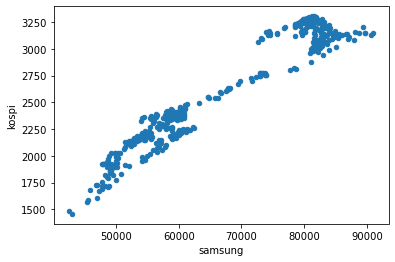

In [70]:
# 컬럼 단위로 저장된 데이터는 시각화하기 좋은 형태입니다. 
# 데이터프레임의 plot 속성 안의 scatter 메서드로 산포도를 그립니다. 
# x 축에는 삼성전자의 종가, y축에는 코스피 지수를 연결합니다.

df.plot.scatter(x='samsung', y='kospi')

# 코스피 지수와 삼성전자의 종가는 그림 8.2.4와 같이 강한 양의 상관관계 가 있음을 알 수 있습니다. 
# 코스피 지수가 시가총액 합산 방식으로 계산돼서, 지수의 20%를 차지하는 삼성전자의 종가와 코스피 지수는 높은 연관성이 있는 겁니다.

In [71]:
# 상관계수를 계산해서 유사한 정도를 수치화해 봅시다. 
# 상관계수는 -1에서 +1 범위 내의 숫자로 표현됩니다. 
# 상관계수가 0.9 이상이면 매우 강한 양의 상관관계, 0.7 이상이면 강한 양의 상관관계가 있다고 말할 수 있습니다. 
# 판다스의 corr 메서드는 컬럼 단위로 상관계수를 계산합니다.

df.corr()

,kospi,samsung
kospi,1.000000,0.966597
samsung,0.966597,1.000000


##03) 코스피의 통계

In [72]:
# 2020년 1월부터 2021년 8월까지의 코스피 지수의 통계를 구해 보겠습니다. 
# 다음 코드는 첫 번째 컬럼을 인덱스로 지정하며, 인덱스를 문자열이 아닌 날짜로 해석합니다. 
# parse_dates는 데이터를 읽으면서 날짜를 DatetimeIndex 객체로 변경하는 유용한 옵션입니다.

import pandas as pd 
kospi = pd.read_excel("data/kospi.xlsx", index_col=0, parse_dates=True)
kospi

C:\Users\USER\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,종가,대비,등락률,시가,고가,저가,거래량,거래대금,상장시가총액
일자,,,,,,,,,
2021-08-31,3199.27,55.08,1.75,3144.49,3199.89,3130.30,661221.0,15863630.0,2.309063e+09
2021-08-30,3144.19,10.29,0.33,3160.87,3164.87,3132.77,602858.0,11758710.0,2.269581e+09
2021-08-27,3133.90,5.37,0.17,3116.29,3143.01,3106.97,520669.0,11039934.0,2.262423e+09
2021-08-26,3128.53,-18.28,-0.58,3151.30,3159.37,3121.04,727719.0,13335288.0,2.259280e+09
2021-08-25,3146.81,8.51,0.27,3148.13,3161.00,3124.25,624688.0,13365596.0,2.272311e+09
...,...,...,...,...,...,...,...,...,...
2019-01-08,2025.27,-11.83,-0.58,2038.68,2042.70,2023.59,397831.0,4826642.0,1.333996e+09
2019-01-07,2037.10,26.85,1.34,2034.24,2048.06,2030.90,440191.0,5301385.0,1.342382e+09
2019-01-04,2010.25,16.55,0.83,1992.40,2011.56,1984.53,408991.0,5490148.0,1.323719e+09


In [74]:
# 주어진 기간에서 코스피 지수의 최저가와 최고가를 구해 봅시다.
kospi['종가'].min(), kospi['종가'].max()

(1457.64, 3305.21)

In [86]:
# 그렇다면 종가를 기준으로 최고가를 기록한 거래일은 언제일까요? 
# 인덱스에는 일자가 들어 있어서 인덱스와 데이터를 함께 얻어오면 원하는 정보를 얻을 수 있습니다. 
# 다음 코드는 최댓값과 종가 시리즈를 비교해서 조건을 이용한 슬라이싱으로 최댓값이 들어 있는 데이터프레임을 선택합니다.
 
kospi_max = kospi[kospi['종가'] == kospi['종가'].max()]
print(kospi_max)

cond =  kospi['종가'] == kospi['종가'].max()
kospi.loc[cond]

                 종가    대비   등락률       시가       고가       저가        거래량  \
일자                                                                      
2021-07-06  3305.21  12.0  0.36  3295.44  3313.51  3295.44  1029465.0   

                  거래대금        상장시가총액  
일자                                    
2021-07-06  14686383.0  2.314417e+09  


,종가,대비,등락률,시가,고가,저가,거래량,거래대금,상장시가총액
일자,,,,,,,,,
2021-07-06,3305.21,12.0,0.36,3295.44,3313.51,3295.44,1029465.0,14686383.0,2.314417e+09


In [90]:
# 선택된 데이터프레임의 인덱스는 DatetimeIndex 객체라서 정수 인덱싱으로 첫 번째 날짜를 가져올 수 있습니다.
# DatetimeIndex 객체 안에 저장돼 있던 2021-07-06의 Timestamp 객체가 출력됩니다.

print(kospi.loc[cond].index)
kospi.loc[cond].index[0]

DatetimeIndex(['2021-07-06'], dtype='datetime64[ns]', name='일자', freq=None)


Timestamp('2021-07-06 00:00:00')

In [93]:
# 간단한 기능인데 조건 비교까지 써야 해서 코드가 복잡해집니다. 
# 빈번하게 사용하는 기능이라서 판다스의 시리즈는 idxmax와 idxmin 메서드를 제공합니다.

print(kospi['종가'].idxmin())
print(kospi['종가'].idxmax())

2020-03-19 00:00:00
2021-07-06 00:00:00


In [108]:
# 이번에는 코스피 지수의 최대 상승폭과 최대 하락폭을 5개씩 출력해 보겠습니다. 
# 다음 코드는 전일 종가와 당일 종가의 차이를 변동폭이라는 컬럼에 저장한 후 정렬해서 데이터를 슬라이싱합니다.

import pandas as pd 

kospi = pd.read_excel("data/kospi.xlsx", index_col=0, usecols=[0, 1])
kospi['변동폭'] = kospi['종가'] - kospi['종가'].shift(1)
print(kospi.sort_values('변동폭').iloc[:5])
print(kospi.sort_values('변동폭', ascending=False).iloc[:5])


                 종가     변동폭
일자                         
2020/03/23  1482.46 -127.51
2021/01/07  3031.68 -120.50
2020/03/19  1457.64 -108.51
2020/06/15  2030.82 -107.23
2021/02/24  2994.98 -104.71
                 종가     변동폭
일자                         
2020/03/18  1591.20  133.56
2020/06/12  2132.30  101.48
2021/01/28  3069.05   92.84
2021/02/25  3099.69   86.74
2020/08/19  2360.54   86.32


C:\Users\USER\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [106]:
kospi

,종가,변동폭
일자,,
2021/08/31,3199.27,NaN
2021/08/30,3144.19,-55.08
2021/08/27,3133.90,-10.29
2021/08/26,3128.53,-5.37
2021/08/25,3146.81,18.28
...,...,...
2019/01/08,2025.27,-39.44
2019/01/07,2037.10,11.83
2019/01/04,2010.25,-26.85


In [111]:
kospi = pd.read_excel("data/kospi.xlsx", index_col=0, parse_dates=True)
kospi.sort_index() 

C:\Users\USER\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,종가,대비,등락률,시가,고가,저가,거래량,거래대금,상장시가총액
일자,,,,,,,,,
2019-01-02,2010.00,-31.04,-1.52,2050.55,2053.45,2004.27,326368.0,4295872.0,1.323645e+09
2019-01-03,1993.70,-16.30,-0.81,2011.81,2014.72,1991.65,427976.0,5358519.0,1.312759e+09
2019-01-04,2010.25,16.55,0.83,1992.40,2011.56,1984.53,408991.0,5490148.0,1.323719e+09
2019-01-07,2037.10,26.85,1.34,2034.24,2048.06,2030.90,440191.0,5301385.0,1.342382e+09
2019-01-08,2025.27,-11.83,-0.58,2038.68,2042.70,2023.59,397831.0,4826642.0,1.333996e+09
...,...,...,...,...,...,...,...,...,...
2021-08-25,3146.81,8.51,0.27,3148.13,3161.00,3124.25,624688.0,13365596.0,2.272311e+09
2021-08-26,3128.53,-18.28,-0.58,3151.30,3159.37,3121.04,727719.0,13335288.0,2.259280e+09
2021-08-27,3133.90,5.37,0.17,3116.29,3143.01,3106.97,520669.0,11039934.0,2.262423e+09


In [117]:
kospi.sort_values('등락률')

,종가,대비,등락률,시가,고가,저가,거래량,거래대금,상장시가총액
일자,,,,,,,,,
2020-03-19,1457.64,-133.56,-8.39,1626.09,1626.09,1439.43,977675.0,11932492.0,9.821697e+08
2020-03-23,1482.46,-83.69,-5.34,1474.45,1516.75,1458.41,647528.0,9645272.0,9.984505e+08
2020-03-18,1591.20,-81.24,-4.86,1686.12,1693.95,1591.12,728008.0,9576387.0,1.071789e+09
2020-06-15,2030.82,-101.48,-4.76,2114.41,2129.67,2030.82,1072278.0,18242465.0,1.366175e+09
2020-03-09,1954.77,-85.45,-4.19,1981.02,1989.50,1946.90,666868.0,8796944.0,1.316428e+09
...,...,...,...,...,...,...,...,...,...
2021-01-08,3152.18,120.50,3.97,3040.11,3161.11,3040.11,1297903.0,40909490.0,2.170538e+09
2020-06-16,2138.05,107.23,5.28,2091.09,2138.08,2079.02,973639.0,13837057.0,1.437701e+09
2020-03-25,1704.76,94.79,5.89,1668.19,1707.64,1645.28,872809.0,12612288.0,1.147712e+09


In [118]:
kospi

,종가,대비,등락률,시가,고가,저가,거래량,거래대금,상장시가총액
일자,,,,,,,,,
2021-08-31,3199.27,55.08,1.75,3144.49,3199.89,3130.30,661221.0,15863630.0,2.309063e+09
2021-08-30,3144.19,10.29,0.33,3160.87,3164.87,3132.77,602858.0,11758710.0,2.269581e+09
2021-08-27,3133.90,5.37,0.17,3116.29,3143.01,3106.97,520669.0,11039934.0,2.262423e+09
2021-08-26,3128.53,-18.28,-0.58,3151.30,3159.37,3121.04,727719.0,13335288.0,2.259280e+09
2021-08-25,3146.81,8.51,0.27,3148.13,3161.00,3124.25,624688.0,13365596.0,2.272311e+09
...,...,...,...,...,...,...,...,...,...
2019-01-08,2025.27,-11.83,-0.58,2038.68,2042.70,2023.59,397831.0,4826642.0,1.333996e+09
2019-01-07,2037.10,26.85,1.34,2034.24,2048.06,2030.90,440191.0,5301385.0,1.342382e+09
2019-01-04,2010.25,16.55,0.83,1992.40,2011.56,1984.53,408991.0,5490148.0,1.323719e+09


In [115]:
(1993.70 - 2010.00) / 2010.00 * 100

-0.8109452736318387

In [ ]:
# nlargest와 nsmallest 메서드를 알고 있다면 코드를 간략하게 표현할 수 있습니다. 
# 메서드로 넘겨주는 숫자를 변경하면 반환되는 데이터의 개수를 지정할 수 있습니다. 
# 코드를 실행하면 정렬 후 슬라이싱하는 코드와 같은 결과를 얻을 수 있습니다.